In [4]:
import configparser
import pandas as pd
import matplotlib.pyplot as plt

# CONFIG
config = configparser.ConfigParser()
config.read('dwh.cfg')

['dwh.cfg']

In [5]:
redshift_endpoint = config['CLUSTER']['HOST']
redshift_user = config['CLUSTER']['DB_USER']
redshift_pass = config['CLUSTER']['DB_PASSWORD']
redshift_port = config['CLUSTER']['DB_PORT']
redshift_dbname = config['CLUSTER']['DB_NAME']

In [7]:
from sqlalchemy import create_engine
engine_string = "postgresql+psycopg2://%s:%s@%s:%s/%s" \
% (redshift_user, redshift_pass, redshift_endpoint, redshift_port, redshift_dbname)
engine = create_engine(engine_string)

In [11]:
df = pd.read_sql_query("""
SELECT gender, level, song
FROM staging_events 
""", engine)

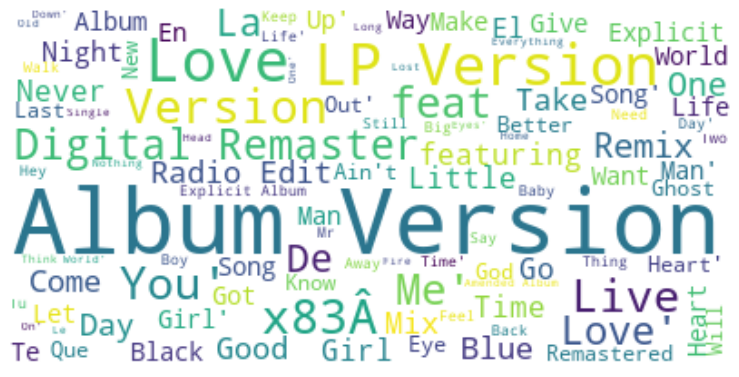

In [12]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = list(set(df.song))
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="white").generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()